In [ ]:

import pandas as pd

# Replace 'your_dataset.csv' with the path to your CSV file
file_path = '/content/combined_all_blue_yello_pink_ruby_white_green_purple_padpashcah_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path, dtype={'image_name_helper': str})


# Print the number of columns in the dataset
print(f"Number of columns in the dataset: {len(df.columns)}")

# Print all column names
print("Columns in the dataset:")
for col in df.columns:
    print(col)


irrelevant_columns = [
    'ns_id', 'total_price', 'carat', 'price_per_carat',
    'length', 'width', 'height', 'origin',  'image1', 'image2', 'image3'
]

# Drop irrelevant columns
df = df.drop(columns=irrelevant_columns)

# Print the number of remaining columns in the DataFrame
print(f"Number of columns after dropping irrelevant ones: {len(df.columns)}")

# Print the remaining columns
print("Remaining columns in the DataFrame:", df.columns.tolist())

X = df.drop(columns=['color', 'clarity', 'cut'])  # Features (input variables)
y = df[['color', 'clarity', 'cut']]  # Target variables

# Save the dataset with target variables separated into a new CSV file
df_target_separated = pd.concat([X, y], axis=1)  # Combine the features and target variables
df_target_separated.to_csv('separated_target_variables.csv', index=False)  # Save to a new CSV file

Number of columns in the dataset: 241
Columns in the dataset:
image_name_helper
ns_id
type
total_price
carat
price_per_carat
color
shape
length
width
height
clarity
cut
color_intensity
origin
treatment
image1
image2
image3
Avg Red
Avg Green
Avg Blue
Contrast
Homogeneity
Energy
Correlation
Edge_Density
Intensity_Variance
Hue_Std
Saturation_Std
Aspect_Ratio
Perimeter
Area
Circularity
Convexity
Edge_Sharpness
Symmetry
R Hist Bin Agg 0
R Hist Bin Agg 1
R Hist Bin Agg 2
R Hist Bin Agg 3
R Hist Bin Agg 4
R Hist Bin Agg 5
R Hist Bin Agg 6
R Hist Bin Agg 7
R Hist Bin Agg 8
R Hist Bin Agg 9
R Hist Bin Agg 10
R Hist Bin Agg 11
R Hist Bin Agg 12
R Hist Bin Agg 13
R Hist Bin Agg 14
R Hist Bin Agg 15
R Hist Bin Agg 16
R Hist Bin Agg 17
R Hist Bin Agg 18
R Hist Bin Agg 19
R Hist Bin Agg 20
R Hist Bin Agg 21
R Hist Bin Agg 22
R Hist Bin Agg 23
R Hist Bin Agg 24
R Hist Bin Agg 25
R Hist Bin Agg 26
R Hist Bin Agg 27
R Hist Bin Agg 28
R Hist Bin Agg 29
R Hist Bin Agg 30
R Hist Bin Agg 31
R Hist Bin Agg 

# Histograms

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv("separated_target_variables.csv")  # Replace with your actual file path

# Get numeric columns
num_cols = df.select_dtypes(include="number").columns

# Define number of rows and columns for subplots
num_plots = len(num_cols)
cols = 3  # Number of columns per row (adjust as needed)
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten axes array to easily iterate

# Loop through numeric columns and plot
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots (if number of plots is less than grid size)
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<ipython-input-3-9660545a71f2>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("separated_target_variables.csv")  # Replace with your actual file path


# Boxplots

<ipython-input-4-858d23922766>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("separated_target_variables.csv")  # Replace with your actual file path


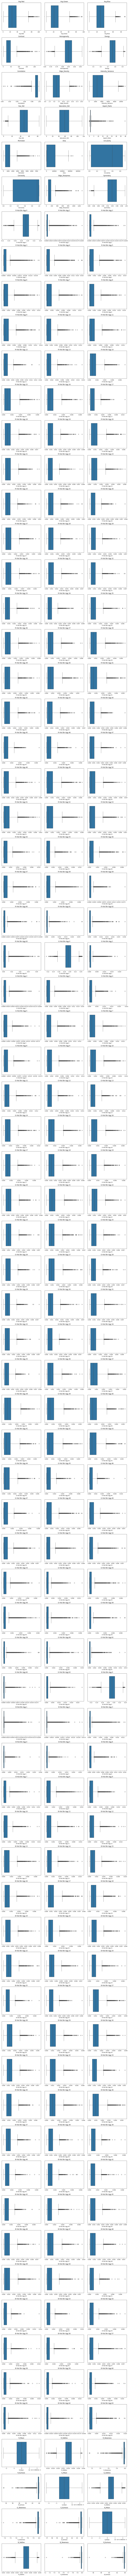

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv("separated_target_variables.csv")  # Replace with your actual file path

# Select numerical columns
num_cols = df.select_dtypes(include="number").columns

# Define the number of rows and columns for subplots
num_cols_count = len(num_cols)
cols = 3  # Number of columns per row
rows = int(np.ceil(num_cols_count / cols))  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each numerical column
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots
for i in range(num_cols_count, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

# Correlation Matrix

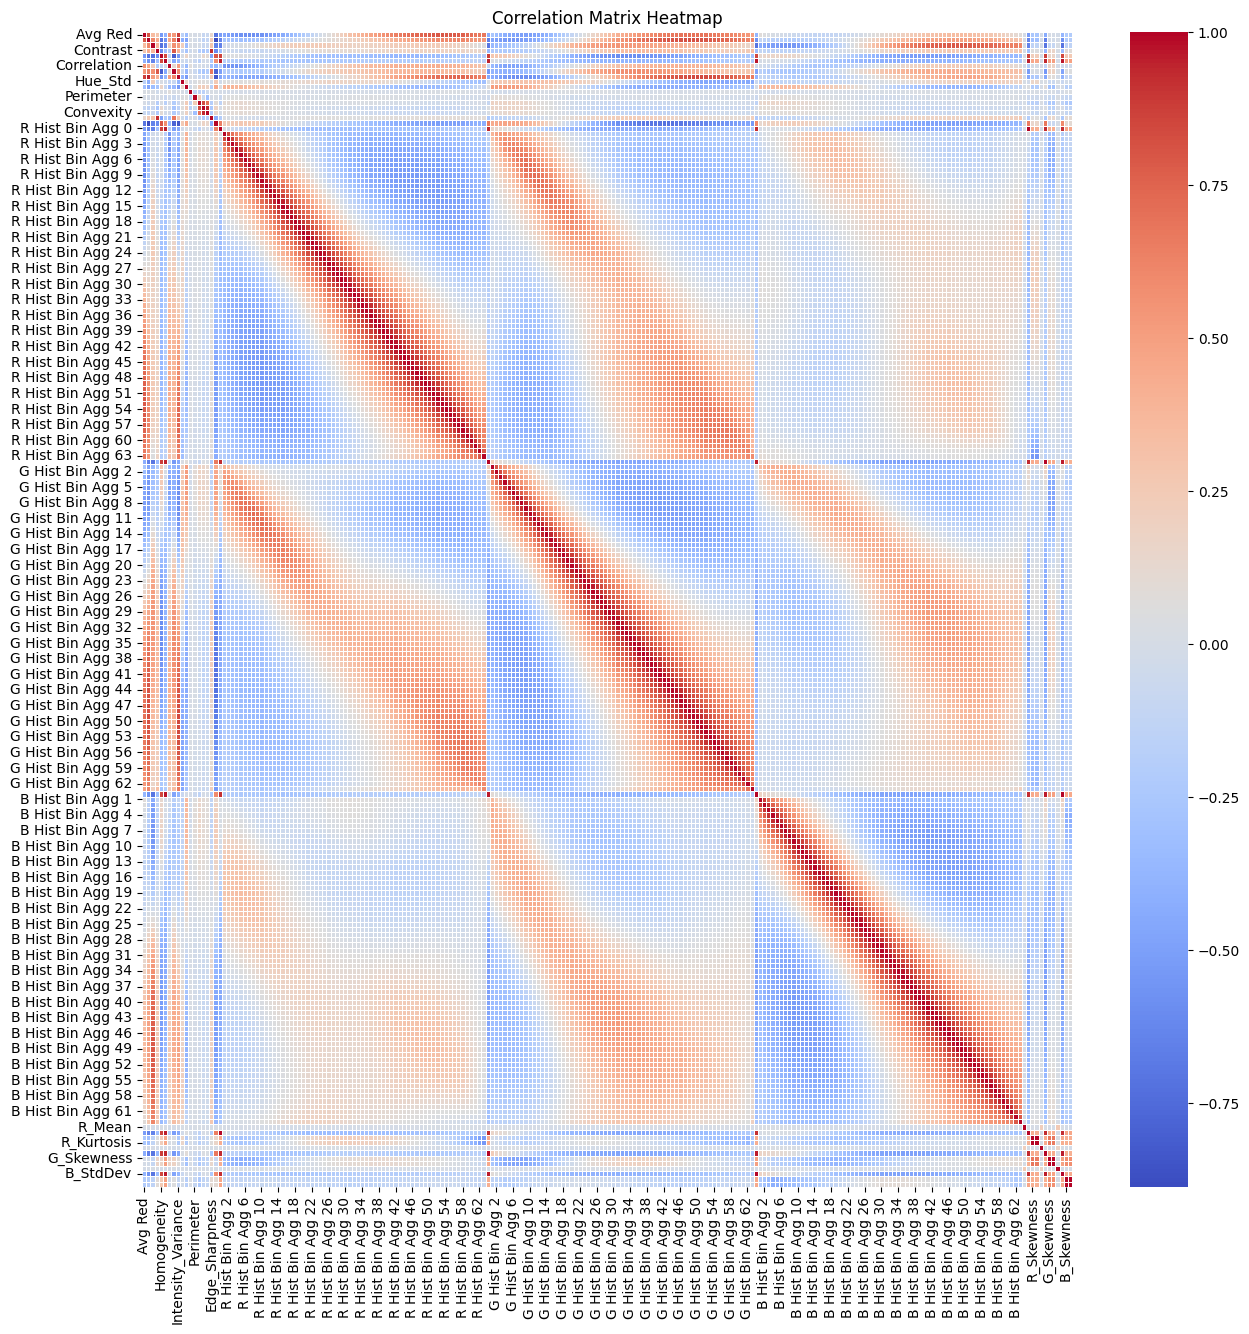

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the numerical columns
correlation_matrix = df[numerical_columns].corr()

# Display the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Check Missing Values

In [ ]:
import pandas as pd

# Read the CSV file (replace with your actual file path)
df = pd.read_csv('separated_target_variables.csv', low_memory=False)

# Separate the features (X) and target variables (y)
X = df.drop(columns=['color', 'clarity', 'cut'])  # Features
y = df[['color', 'clarity', 'cut']]  # Target variables

# 1. Check for missing values in features (X)
missing_values_features = X.isnull().sum()

# Print missing values for features (X)
print("Missing values in features (X):")
for column, missing_count in missing_values_features.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

# 2. Check for missing values in target variables (y)
missing_values_target = y.isnull().sum()

# Print missing values for target variables (y)
print("\nMissing values in target variables (y):")
for column, missing_count in missing_values_target.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

Missing values in features (X):
Column: image_name_helper, Missing Values: 0
Column: type, Missing Values: 0
Column: shape, Missing Values: 0
Column: color_intensity, Missing Values: 0
Column: treatment, Missing Values: 0
Column: Avg Red, Missing Values: 76
Column: Avg Green, Missing Values: 76
Column: Avg Blue, Missing Values: 76
Column: Contrast, Missing Values: 76
Column: Homogeneity, Missing Values: 76
Column: Energy, Missing Values: 76
Column: Correlation, Missing Values: 76
Column: Edge_Density, Missing Values: 76
Column: Intensity_Variance, Missing Values: 76
Column: Hue_Std, Missing Values: 76
Column: Saturation_Std, Missing Values: 76
Column: Aspect_Ratio, Missing Values: 76
Column: Perimeter, Missing Values: 76
Column: Area, Missing Values: 76
Column: Circularity, Missing Values: 76
Column: Convexity, Missing Values: 76
Column: Edge_Sharpness, Missing Values: 76
Column: Symmetry, Missing Values: 76
Column: R Hist Bin Agg 0, Missing Values: 76
Column: R Hist Bin Agg 1, Missing

# Handle missing values - type 1

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load dataset
df = pd.read_csv("separated_target_variables.csv")

# Identify columns for different imputation techniques
median_columns = ['Avg Green', 'Avg Blue', 'Correlation', 'Saturation_Std', 'Area', 'G_Kurtosis', 'B_Kurtosis']
mean_columns = ['Homogeneity', 'Energy','Symmetry','R Hist Bin Agg 0','G Hist Bin Agg 0','B Hist Bin Agg 0',
                'R_Mean','R_StdDev','G_Mean','G_StdDev','B_Mean','B_StdDev']
mode_columns = [
    'R Hist Bin Agg ' + str(i) for i in range(1, 64)] + [
    'G Hist Bin Agg ' + str(i) for i in range(1, 64)] + [
    'B Hist Bin Agg ' + str(i) for i in range(1, 64)] + [
    'Edge_Density','Aspect_Ratio','Edge_Sharpness']
knn_columns = ['Avg Red','Contrast', 'Hue_Std', 'Intensity_Variance','Perimeter',
               'Circularity','Convexity','R_Skewness','R_Kurtosis','G_Skewness','B_Skewness']

# Apply Median Imputation
df[median_columns] = df[median_columns].apply(lambda x: x.fillna(x.median()))

# Apply Mean Imputation
df[mean_columns] = df[mean_columns].apply(lambda x: x.fillna(x.mean()))

# Apply Mode Imputation
def mode_imputation(column):
    return column.fillna(column.mode()[0]) if not column.mode().empty else column

df[mode_columns] = df[mode_columns].apply(mode_imputation)

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df[knn_columns] = knn_imputer.fit_transform(df[knn_columns])

# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

print("Missing values handled and dataset saved successfully.")

<ipython-input-8-f5903d4eb0f0>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("separated_target_variables.csv")


Missing values handled and dataset saved successfully.


# Handle missing values - type 2

In [ ]:
import pandas as pd

# Read the CSV file (replace with your actual file path)
df = pd.read_csv('cleaned_dataset.csv', low_memory=False)

# Separate the features (X) and target variables (y)
X = df.drop(columns=['color', 'clarity', 'cut'])  # Features
y = df[['color', 'clarity', 'cut']]  # Target variables

# 1. Check for missing values in features (X)
missing_values_features = X.isnull().sum()

# Print missing values for features (X)
print("Missing values in features (X):")
for column, missing_count in missing_values_features.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

# 2. Check for missing values in target variables (y)
missing_values_target = y.isnull().sum()

# Print missing values for target variables (y)
print("\nMissing values in target variables (y):")
for column, missing_count in missing_values_target.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

Missing values in features (X):
Column: image_name_helper, Missing Values: 0
Column: type, Missing Values: 0
Column: shape, Missing Values: 0
Column: color_intensity, Missing Values: 0
Column: treatment, Missing Values: 0
Column: Avg Red, Missing Values: 0
Column: Avg Green, Missing Values: 0
Column: Avg Blue, Missing Values: 0
Column: Contrast, Missing Values: 0
Column: Homogeneity, Missing Values: 0
Column: Energy, Missing Values: 0
Column: Correlation, Missing Values: 0
Column: Edge_Density, Missing Values: 0
Column: Intensity_Variance, Missing Values: 0
Column: Hue_Std, Missing Values: 0
Column: Saturation_Std, Missing Values: 0
Column: Aspect_Ratio, Missing Values: 0
Column: Perimeter, Missing Values: 0
Column: Area, Missing Values: 0
Column: Circularity, Missing Values: 0
Column: Convexity, Missing Values: 0
Column: Edge_Sharpness, Missing Values: 0
Column: Symmetry, Missing Values: 0
Column: R Hist Bin Agg 0, Missing Values: 0
Column: R Hist Bin Agg 1, Missing Values: 0
Column: 

# Outlier Treatments

In [ ]:
import pandas as pd

# Read CSV file
df = pd.read_csv("/content/cleaned_dataset.csv")  # Replace with your actual file path

# Select numerical columns
num_cols = df.select_dtypes(include="number").columns

# Identify continuous numerical columns
continuous_cols = [col for col in num_cols if df[col].nunique() > 20]  # Threshold of 20 unique values

print("Continuous Numerical Columns:", continuous_cols)

print("Number of Continuous Numerical Columns:", len(continuous_cols))

<ipython-input-12-57740da2d91f>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/cleaned_dataset.csv")  # Replace with your actual file path


Continuous Numerical Columns: ['Avg Red', 'Avg Green', 'Avg Blue', 'Contrast', 'Homogeneity', 'Energy', 'Correlation', 'Edge_Density', 'Intensity_Variance', 'Hue_Std', 'Saturation_Std', 'Aspect_Ratio', 'Perimeter', 'Area', 'Circularity', 'Convexity', 'Edge_Sharpness', 'Symmetry', 'R Hist Bin Agg 0', 'R Hist Bin Agg 1', 'R Hist Bin Agg 2', 'R Hist Bin Agg 3', 'R Hist Bin Agg 4', 'R Hist Bin Agg 5', 'R Hist Bin Agg 6', 'R Hist Bin Agg 7', 'R Hist Bin Agg 8', 'R Hist Bin Agg 9', 'R Hist Bin Agg 10', 'R Hist Bin Agg 11', 'R Hist Bin Agg 12', 'R Hist Bin Agg 13', 'R Hist Bin Agg 14', 'R Hist Bin Agg 15', 'R Hist Bin Agg 16', 'R Hist Bin Agg 17', 'R Hist Bin Agg 18', 'R Hist Bin Agg 19', 'R Hist Bin Agg 20', 'R Hist Bin Agg 21', 'R Hist Bin Agg 22', 'R Hist Bin Agg 23', 'R Hist Bin Agg 24', 'R Hist Bin Agg 25', 'R Hist Bin Agg 26', 'R Hist Bin Agg 27', 'R Hist Bin Agg 28', 'R Hist Bin Agg 29', 'R Hist Bin Agg 30', 'R Hist Bin Agg 31', 'R Hist Bin Agg 32', 'R Hist Bin Agg 33', 'R Hist Bin Agg

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file
df = pd.read_csv("/content/cleaned_dataset.csv")  # Replace with your actual file path

# Step 2: Select only continuous numerical columns
# Continuous columns usually have float data types
continuous_num_cols = df.select_dtypes(include=['float64', 'float32']).columns

# Step 3: Function to detect outliers using the IQR method (Only for continuous numerical columns)
def detect_outliers_iqr(data, columns, threshold=1.5):
    outliers_dict = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = data[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Identify outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]

        # Store outliers if found
        if not outliers.empty:
            outliers_dict[col] = outliers

    return outliers_dict

# Step 4: Detect outliers in the dataset (only for continuous numerical columns)
outliers = detect_outliers_iqr(df, continuous_num_cols)

# Step 5: Replace outliers with the median value
def replace_outliers_with_median(data, outliers_dict):
    for col, outlier_values in outliers_dict.items():
        median_value = data[col].median()
        # Replace outliers with the median value
        data[col] = np.where(data[col].isin(outlier_values), median_value, data[col])
    return data

# Replace outliers with the median value (only for continuous numerical columns)
df_cleaned = replace_outliers_with_median(df.copy(), outliers)

# Step 6: Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("/content/cleaned_dataset_no_outliers.csv", index=False)

# Step 7: Check if any outliers remain in the cleaned dataset
outliers_after_cleaning = detect_outliers_iqr(df_cleaned, continuous_num_cols)

# Print results
if not outliers_after_cleaning:
    print("No outliers found in the cleaned dataset.")
else:
    for col, outlier_values in outliers_after_cleaning.items():
        print(f"Outliers still present in {col}:")
        print(outlier_values)
        print("\n")

<ipython-input-13-c323c9fc2cf3>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/cleaned_dataset.csv")  # Replace with your actual file path


Outliers still present in Avg Red:
8204     70.109831
8509     70.513565
8514     70.689228
8577     69.997041
8599     70.886626
8609     70.398270
8881     70.232049
9252     70.306892
9276     70.244650
9433     70.846577
10122    70.073439
12071    70.833049
12314    70.158335
12603    70.656850
Name: Avg Red, dtype: float64


Outliers still present in Avg Green:
374      62.072014
1279     62.404679
1537     62.227961
8533     61.892783
8539     62.129341
8550     61.618695
8562     62.473909
8571     62.271329
8599     62.423976
8635     61.810516
8752     62.042171
9008     62.110524
9021     62.526815
9120     62.311642
9221     61.433744
9261     62.015250
9335     62.144535
9449     62.357128
9616     61.484043
9622     62.431516
9723     61.778002
9925     61.976900
10104    61.785636
10127    62.402596
12616    62.475909
Name: Avg Green, dtype: float64


Outliers still present in Avg Blue:
189     65.424764
906     65.450352
998     65.852742
1330    65.520785
5292    65.38

# Duplicates

In [ ]:
# Check for duplicates based on specific columns
duplicate_rows = df[df.duplicated(subset=['image_name_helper', 'type', 'shape'], keep=False)]

# Display the duplicate rows
print(f"Total duplicate rows based on selected columns: {duplicate_rows.shape[0]}")
duplicate_rows

Total duplicate rows based on selected columns: 210


image_name_helper                   type              shape  \
52                   60          Blue Sapphire  Asscher - Octagon   
53                   60          Blue Sapphire  Asscher - Octagon   
1131               1140          Blue Sapphire               Oval   
1132               1140          Blue Sapphire               Oval   
1188               1197          Blue Sapphire              Round   
...                 ...                    ...                ...   
12411            S12599  Padparadscha Sapphire               Oval   
12412            S12595  Padparadscha Sapphire            Cushion   
12413             S7963  Padparadscha Sapphire               Oval   
12414             S4906  Padparadscha Sapphire            Cushion   
12415             S7856  Padparadscha Sapphire               Oval   

      color_intensity       treatment    Avg Red  Avg Green   Avg Blue  \
52            Intense          Heated  12.399575  14.752264  24.721695   
53            Intense          Heated  12.399575  14.752264  24.721695   
1131          Intense          Heated  13.640049  16.376364  31.039002   
1132          Intense          Heated  13.640049  16.376364  31.039002   
1188           Medium  No Enhancement  46.656772  47.554077  56.043646   
...               ...             ...        ...        ...        ...   
12411         Intense  No Enhancement  49.775402  42.732587  38.000589   
12412          Medium  No Enhancement  64.091720  54.552961  49.306311   
12413  Medium Intense  No Enhancement  56.066205  41.917140  34.692965   
12414    Medium Light  No Enhancement  80.759067  63.034974  60.174695   
12415         Intense  No Enhancement  66.383126  53.398197  44.868413   

        Contrast  Homogeneity  ...  G_StdDev  G_Skewness  G_Kurtosis  \
52     27.670728     0.879465  ...  0.025601    7.990559   63.897253   
53     27.670728     0.879465  ...  0.025601    7.990559   63.897253   
1131   39.213276     0.846922  ...  0.023990    7.985266   63.839858   
1132   39.213276     0.846922  ...  0.023990    7.985266   63.839858   
1188   27.094651     0.796189  ...  0.021899    7.968682   63.659914   
...          ...          ...  ...       ...         ...         ...   
12411  29.091313     0.858189  ...  0.024459    7.981678   63.800799   
12412  47.446030     0.798987  ...  0.021990    7.971845   63.693656   
12413  21.940425     0.836032  ...  0.023411    7.975441   63.732961   
12414  30.928059     0.769009  ...  0.020151    7.925956   63.193847   
12415  27.618227     0.818003  ...  0.022354    7.957208   63.533722   

         B_Mean  B_StdDev  B_Skewness  B_Kurtosis  \
52     0.003906  0.025593    7.996678   63.964018   
53     0.003906  0.025593    7.996678   63.964018   
1131   0.003906  0.023606    7.986611   63.852990   
1132   0.003906  0.023606    7.986611   63.852990   
1188   0.003906  0.021906    7.960611   63.572069   
...         ...       ...         ...         ...   
12411  0.003906  0.024452    7.990374   63.895712   
12412  0.003906  0.021982    7.982168   63.806828   
12413  0.003906  0.023407    7.980515   63.788608   
12414  0.003906  0.020135    7.946233   63.416106   
12415  0.003906  0.022344    7.969269   63.666202   

                                               color                 clarity  \
52                                              Blue               Eye Clean   
53                                              Blue               Eye Clean   
1131                                            Blue  Very Slightly Included   
1132                                            Blue  Very Slightly Included   
1188                                            Blue       Slightly Included   
...                                              ...                     ...   
12411  Padparadscha (Pinkish-Orange / Orangish-Pink)               Eye Clean   
12412  Padparadscha (Pinkish-Orange / Orangish-Pink)               Eye Clean   
12413  Padparadscha (Pinkish-Orange / Orangish-Pink)  Very Slightl

In [ ]:
import pandas as pd

# Load your dataset (if not already loaded)
df = pd.read_csv("/content/cleaned_dataset_no_outliers.csv")  # Uncomment and replace with your file path

# Remove duplicates based on selected columns, keeping only the first occurrence
df_cleaned = df.drop_duplicates(subset=['image_name_helper', 'type', 'shape'], keep='first')

# Reset index after removing duplicates
df_cleaned.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("remove_duplicates_dataset.csv", index=False)

print("Duplicates removed and dataset saved as 'cleaned_dataset.csv'")

<ipython-input-15-3b6e4eae5bb7>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/cleaned_dataset_no_outliers.csv")  # Uncomment and replace with your file path


Duplicates removed and dataset saved as 'cleaned_dataset.csv'


In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv("/content/remove_duplicates_dataset.csv")

# Check for duplicates based on selected columns
duplicate_rows = df[df.duplicated(subset=['image_name_helper', 'type', 'shape'], keep=False)]

# Display the number of duplicate rows and the duplicate data
print(f"Total duplicate rows based on selected columns: {duplicate_rows.shape[0]}")
print(duplicate_rows)

Total duplicate rows based on selected columns: 0
Empty DataFrame
Columns: [image_name_helper, type, shape, color_intensity, treatment, Avg Red, Avg Green, Avg Blue, Contrast, Homogeneity, Energy, Correlation, Edge_Density, Intensity_Variance, Hue_Std, Saturation_Std, Aspect_Ratio, Perimeter, Area, Circularity, Convexity, Edge_Sharpness, Symmetry, R Hist Bin Agg 0, R Hist Bin Agg 1, R Hist Bin Agg 2, R Hist Bin Agg 3, R Hist Bin Agg 4, R Hist Bin Agg 5, R Hist Bin Agg 6, R Hist Bin Agg 7, R Hist Bin Agg 8, R Hist Bin Agg 9, R Hist Bin Agg 10, R Hist Bin Agg 11, R Hist Bin Agg 12, R Hist Bin Agg 13, R Hist Bin Agg 14, R Hist Bin Agg 15, R Hist Bin Agg 16, R Hist Bin Agg 17, R Hist Bin Agg 18, R Hist Bin Agg 19, R Hist Bin Agg 20, R Hist Bin Agg 21, R Hist Bin Agg 22, R Hist Bin Agg 23, R Hist Bin Agg 24, R Hist Bin Agg 25, R Hist Bin Agg 26, R Hist Bin Agg 27, R Hist Bin Agg 28, R Hist Bin Agg 29, R Hist Bin Agg 30, R Hist Bin Agg 31, R Hist Bin Agg 32, R Hist Bin Agg 33, R Hist Bin Agg

<ipython-input-16-10496d8c0621>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/remove_duplicates_dataset.csv")


# Handle Highly Skewed distribution

<ipython-input-17-c4883f04518d>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/remove_duplicates_dataset.csv')  # Replace with the actual path of your CSV file


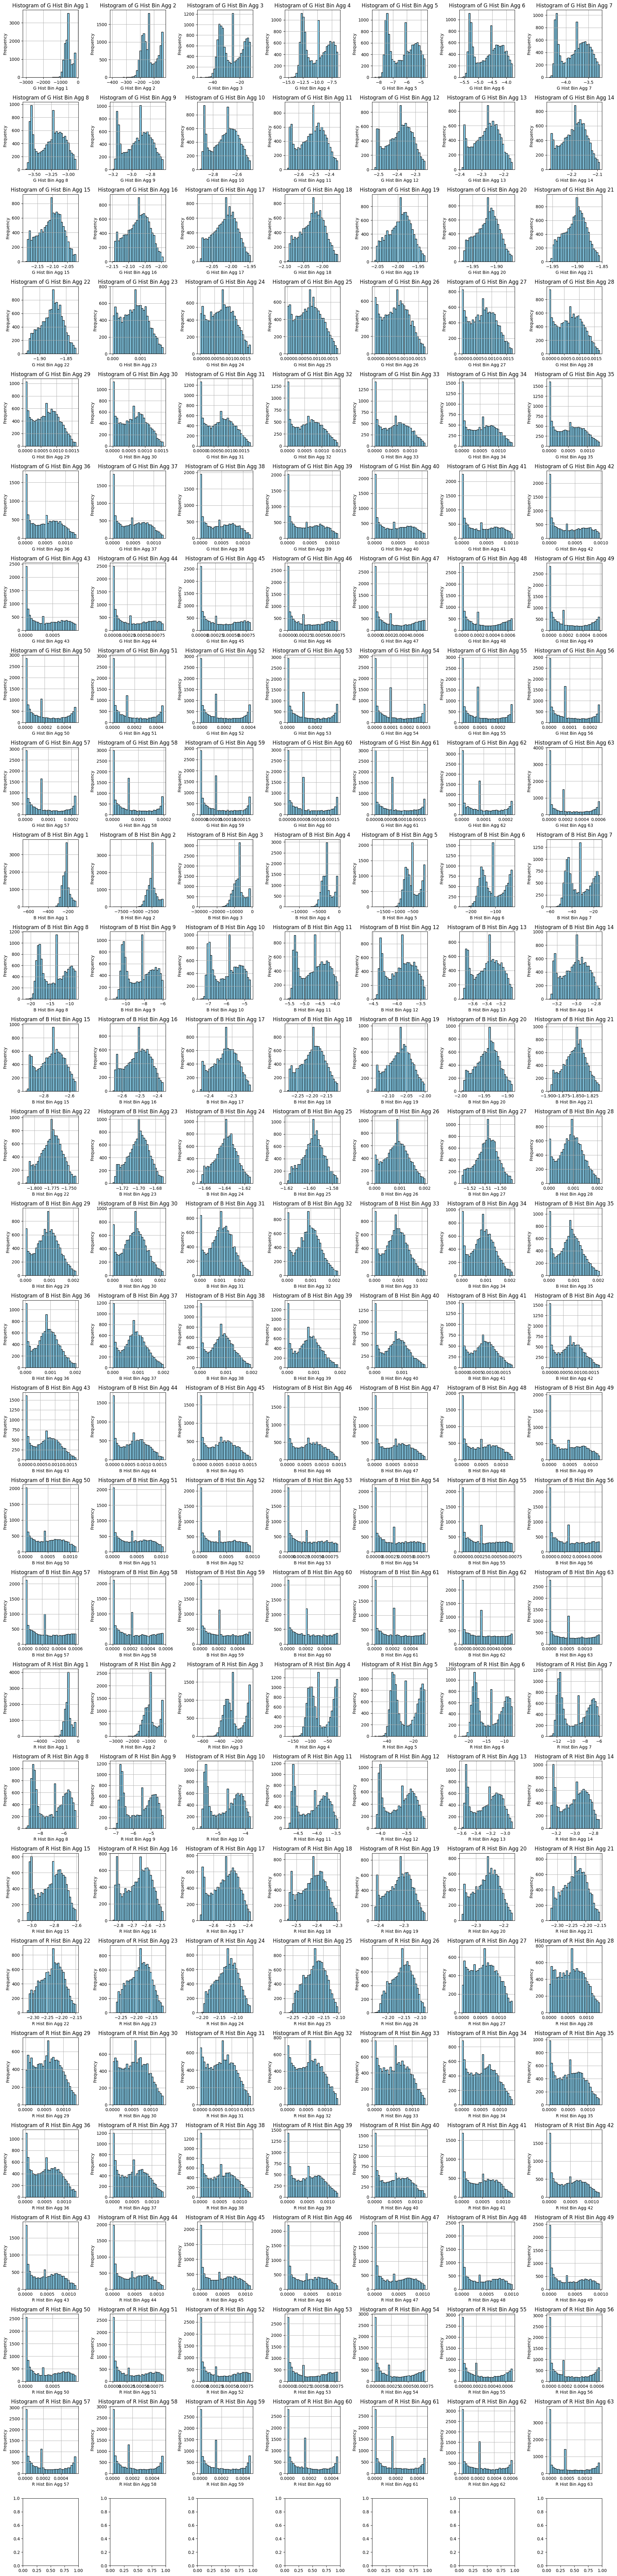

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Read CSV file
df = pd.read_csv('/content/remove_duplicates_dataset.csv')  # Replace with the actual path of your CSV file

# Step 2: Replace infinite values and drop NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Step 3: Green Channel: List of columns related to green channel intensity
green_columns = [
    'G Hist Bin Agg 1', 'G Hist Bin Agg 2', 'G Hist Bin Agg 3', 'G Hist Bin Agg 4', 'G Hist Bin Agg 5',
    'G Hist Bin Agg 6', 'G Hist Bin Agg 7', 'G Hist Bin Agg 8', 'G Hist Bin Agg 9', 'G Hist Bin Agg 10',
    'G Hist Bin Agg 11', 'G Hist Bin Agg 12', 'G Hist Bin Agg 13', 'G Hist Bin Agg 14', 'G Hist Bin Agg 15',
    'G Hist Bin Agg 16', 'G Hist Bin Agg 17', 'G Hist Bin Agg 18', 'G Hist Bin Agg 19', 'G Hist Bin Agg 20',
    'G Hist Bin Agg 21', 'G Hist Bin Agg 22', 'G Hist Bin Agg 23', 'G Hist Bin Agg 24', 'G Hist Bin Agg 25',
    'G Hist Bin Agg 26', 'G Hist Bin Agg 27', 'G Hist Bin Agg 28', 'G Hist Bin Agg 29', 'G Hist Bin Agg 30',
    'G Hist Bin Agg 31', 'G Hist Bin Agg 32', 'G Hist Bin Agg 33', 'G Hist Bin Agg 34', 'G Hist Bin Agg 35',
    'G Hist Bin Agg 36', 'G Hist Bin Agg 37', 'G Hist Bin Agg 38', 'G Hist Bin Agg 39', 'G Hist Bin Agg 40',
    'G Hist Bin Agg 41', 'G Hist Bin Agg 42', 'G Hist Bin Agg 43', 'G Hist Bin Agg 44', 'G Hist Bin Agg 45',
    'G Hist Bin Agg 46', 'G Hist Bin Agg 47', 'G Hist Bin Agg 48', 'G Hist Bin Agg 49', 'G Hist Bin Agg 50',
    'G Hist Bin Agg 51', 'G Hist Bin Agg 52', 'G Hist Bin Agg 53', 'G Hist Bin Agg 54', 'G Hist Bin Agg 55',
    'G Hist Bin Agg 56', 'G Hist Bin Agg 57', 'G Hist Bin Agg 58', 'G Hist Bin Agg 59', 'G Hist Bin Agg 60',
    'G Hist Bin Agg 61', 'G Hist Bin Agg 62', 'G Hist Bin Agg 63'
]

# Step 4: Blue Channel: List of columns related to blue channel intensity
blue_columns = [
    'B Hist Bin Agg 1', 'B Hist Bin Agg 2', 'B Hist Bin Agg 3', 'B Hist Bin Agg 4', 'B Hist Bin Agg 5',
    'B Hist Bin Agg 6', 'B Hist Bin Agg 7', 'B Hist Bin Agg 8', 'B Hist Bin Agg 9', 'B Hist Bin Agg 10',
    'B Hist Bin Agg 11', 'B Hist Bin Agg 12', 'B Hist Bin Agg 13', 'B Hist Bin Agg 14', 'B Hist Bin Agg 15',
    'B Hist Bin Agg 16', 'B Hist Bin Agg 17', 'B Hist Bin Agg 18', 'B Hist Bin Agg 19', 'B Hist Bin Agg 20',
    'B Hist Bin Agg 21', 'B Hist Bin Agg 22', 'B Hist Bin Agg 23', 'B Hist Bin Agg 24', 'B Hist Bin Agg 25',
    'B Hist Bin Agg 26', 'B Hist Bin Agg 27', 'B Hist Bin Agg 28', 'B Hist Bin Agg 29', 'B Hist Bin Agg 30',
    'B Hist Bin Agg 31', 'B Hist Bin Agg 32', 'B Hist Bin Agg 33', 'B Hist Bin Agg 34', 'B Hist Bin Agg 35',
    'B Hist Bin Agg 36', 'B Hist Bin Agg 37', 'B Hist Bin Agg 38', 'B Hist Bin Agg 39', 'B Hist Bin Agg 40',
    'B Hist Bin Agg 41', 'B Hist Bin Agg 42', 'B Hist Bin Agg 43', 'B Hist Bin Agg 44', 'B Hist Bin Agg 45',
    'B Hist Bin Agg 46', 'B Hist Bin Agg 47', 'B Hist Bin Agg 48', 'B Hist Bin Agg 49', 'B Hist Bin Agg 50',
    'B Hist Bin Agg 51', 'B Hist Bin Agg 52', 'B Hist Bin Agg 53', 'B Hist Bin Agg 54', 'B Hist Bin Agg 55',
    'B Hist Bin Agg 56', 'B Hist Bin Agg 57', 'B Hist Bin Agg 58', 'B Hist Bin Agg 59', 'B Hist Bin Agg 60',
    'B Hist Bin Agg 61', 'B Hist Bin Agg 62', 'B Hist Bin Agg 63'
]

# Step 5: Red Channel: List of columns related to red channel intensity
red_columns = [
    'R Hist Bin Agg 1', 'R Hist Bin Agg 2', 'R Hist Bin Agg 3', 'R Hist Bin Agg 4', 'R Hist Bin Agg 5',
    'R Hist Bin Agg 6', 'R Hist Bin Agg 7', 'R Hist Bin Agg 8', 'R Hist Bin Agg 9', 'R Hist Bin Agg 10',
    'R Hist Bin Agg 11', 'R Hist Bin Agg 12', 'R Hist Bin Agg 13', 'R Hist Bin Agg 14', 'R Hist Bin Agg 15',
    'R Hist Bin Agg 16', 'R Hist Bin Agg 17', 'R Hist Bin Agg 18', 'R Hist Bin Agg 19', 'R Hist Bin Agg 20',
    'R Hist Bin Agg 21', 'R Hist Bin Agg 22', 'R Hist Bin Agg 23', 'R Hist Bin Agg 24', 'R Hist Bin Agg 25',
    'R Hist Bin Agg 26', 'R Hist Bin Agg 27', 'R Hist Bin Agg 28', 'R Hist Bin Agg 29', 'R Hist Bin Agg 30',
    'R Hist Bin Agg 31', 'R Hist Bin Agg 32', 'R Hist Bin Agg 33', 'R Hist Bin Agg 34', 'R Hist Bin Agg 35',
    'R Hist Bin Agg 36', 'R Hist Bin Agg 37', 'R Hist Bin Agg 38', 'R Hist Bin Agg 39', 'R Hist Bin Agg 40',
    'R Hist Bin Agg 41', 'R Hist Bin Agg 42', 'R Hist Bin Agg 43', 'R Hist Bin Agg 44', 'R Hist Bin Agg 45',
    'R Hist Bin Agg 46', 'R Hist Bin Agg 47', 'R Hist Bin Agg 48', 'R Hist Bin Agg 49', 'R Hist Bin Agg 50',
    'R Hist Bin Agg 51', 'R Hist Bin Agg 52', 'R Hist Bin Agg 53', 'R Hist Bin Agg 54', 'R Hist Bin Agg 55',
    'R Hist Bin Agg 56', 'R Hist Bin Agg 57', 'R Hist Bin Agg 58', 'R Hist Bin Agg 59', 'R Hist Bin Agg 60',
    'R Hist Bin Agg 61', 'R Hist Bin Agg 62', 'R Hist Bin Agg 63'
]

# Step 6: Combine all channels (Red, Green, and Blue columns)
all_columns = green_columns + blue_columns + red_columns

# Step 7: Ensure all values are positive and check for constant columns
valid_columns = []
for col in all_columns:
    if df[col].nunique() > 1:  # Skip constant columns
        min_val = df[col].min()
        if min_val <= 0:
            df[col] = df[col] + abs(min_val) + 1  # Shift to be positive
        valid_columns.append(col)

# Step 8: Apply Box-Cox or Yeo-Johnson Transformation
boxcox_lambdas = {}
for col in valid_columns:
    if np.all(np.isfinite(df[col])):  # Ensure all values are finite
        try:
            df[col], boxcox_lambda = stats.boxcox(df[col])  # Try Box-Cox
            boxcox_lambdas[col] = boxcox_lambda
        except:
            df[col], yeo_lambda = stats.yeojohnson(df[col])  # Fallback to Yeo-Johnson
            boxcox_lambdas[col] = yeo_lambda

# Step 9: Adjust the number of rows and columns for the plot grid
rows = (len(valid_columns) // 7) + 1  # Calculate the number of rows required
cols = 7  # Keep the number of columns fixed

# Step 10: Plot histograms after transformation
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 3))  # Adjust grid size if needed
axes = axes.flatten()

for i, col in enumerate(valid_columns):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Step 11: Save the transformed dataframe to a new CSV file
df.to_csv('transformed_dataset.csv', index=False)

<ipython-input-18-630d55caf016>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('transformed_dataset.csv')  # Ensure correct path


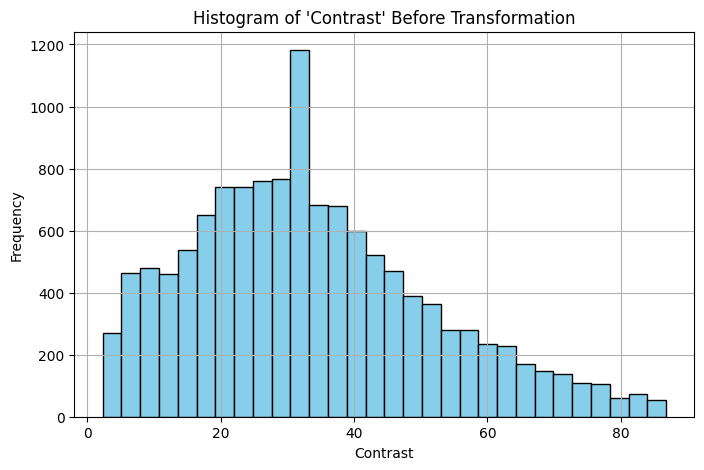

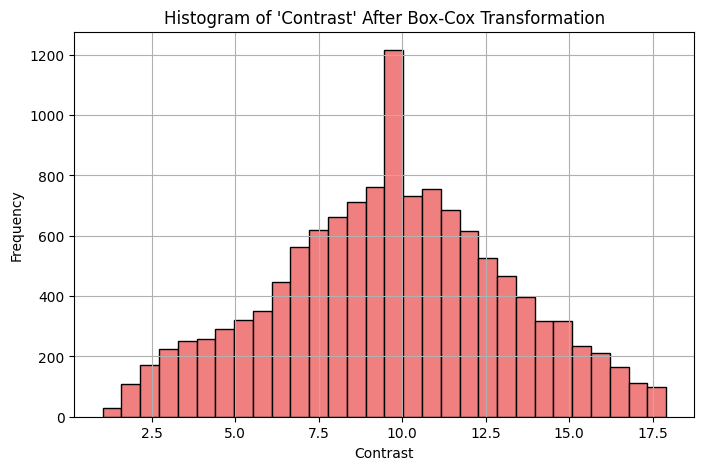

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Load the dataset
df = pd.read_csv('transformed_dataset.csv')  # Ensure correct path

# Step 2: Plot original histogram of 'Contrast'
plt.figure(figsize=(8, 5))
plt.hist(df['Contrast'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of 'Contrast' Before Transformation")
plt.xlabel("Contrast")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 3: Apply Box-Cox transformation (Ensure all values are positive)
min_contrast = df['Contrast'].min()
if min_contrast <= 0:
    df['Contrast'] = df['Contrast'] + abs(min_contrast) + 1  # Shift to be positive

df['Contrast'], lambda_contrast = stats.boxcox(df['Contrast'])  # Apply Box-Cox

# Step 4: Plot transformed histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Contrast'], bins=30, color='lightcoral', edgecolor='black')
plt.title("Histogram of 'Contrast' After Box-Cox Transformation")
plt.xlabel("Contrast")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 5: Save the dataset (Ensure only 'Contrast' column is modified)
df.to_csv('contrast_feature_dataset.csv', index=False)

# Handle Imbalanced Dataset

<ipython-input-19-773b0f4cb0c4>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y1, palette="viridis")
<ipython-input-19-773b0f4cb0c4>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y2, palette="viridis")
<ipython-input-19-773b0f4cb0c4>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y3, palette="viridis")


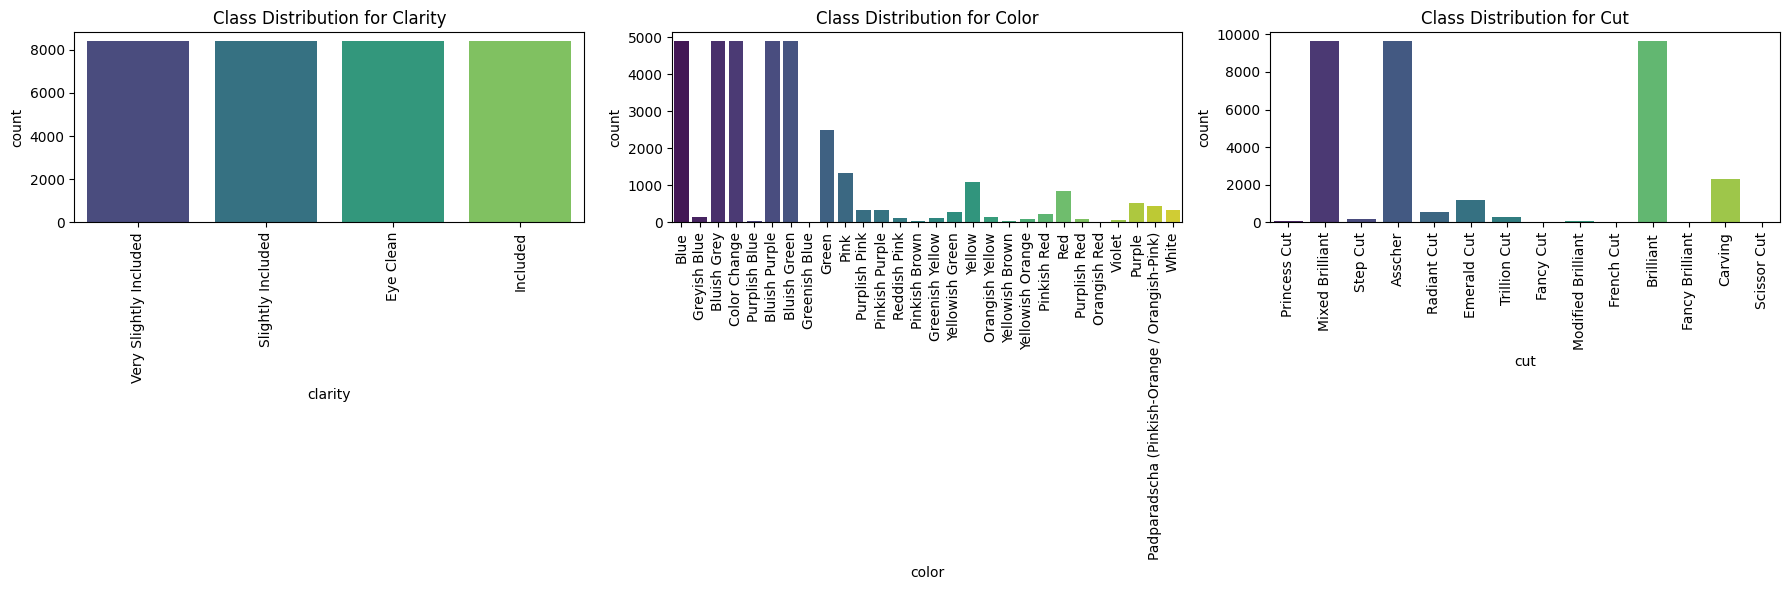

Dataset after resampling has been saved as 'resampled_dataset.csv'


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the preprocessed dataset
data = pd.read_csv('contrast_feature_dataset.csv', low_memory=False)

# Separate the features (X) and target variables (y)
X = data.drop(columns=['clarity', 'color', 'cut'])  # Features (without target variables)
y = data[['clarity', 'color', 'cut']]  # Target variables

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample each target variable separately
X_resampled_clarity, y_resampled_clarity = ros.fit_resample(X, y['clarity'])
X_resampled_color, y_resampled_color = ros.fit_resample(X, y['color'])
X_resampled_cut, y_resampled_cut = ros.fit_resample(X, y['cut'])

# Combine the resampled target variables into a DataFrame
y_resampled = pd.DataFrame({
    'clarity': y_resampled_clarity,
    'color': y_resampled_color,
    'cut': y_resampled_cut
})

# Ensure that all resampled datasets have the same number of rows
min_length = min(len(y_resampled_clarity), len(y_resampled_color), len(y_resampled_cut))

X_resampled_final = X_resampled_clarity.iloc[:min_length]
y_resampled_final = y_resampled.iloc[:min_length]

# Step 2: Plot class distributions
def plot_class_distribution(y1, y2, y3):
    plt.figure(figsize=(18, 6))  # Set a large figure size for side-by-side plots

    # Plot clarity distribution
    plt.subplot(1, 3, 1)  # (rows, columns, plot number)
    sns.countplot(x=y1, palette="viridis")
    plt.title("Class Distribution for Clarity")
    plt.xticks(rotation=90)

    # Plot color distribution
    plt.subplot(1, 3, 2)
    sns.countplot(x=y2, palette="viridis")
    plt.title("Class Distribution for Color")
    plt.xticks(rotation=90)

    # Plot cut distribution
    plt.subplot(1, 3, 3)
    sns.countplot(x=y3, palette="viridis")
    plt.title("Class Distribution for Cut")
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# Plot distributions for resampled target variables
plot_class_distribution(y_resampled_final['clarity'], y_resampled_final['color'], y_resampled_final['cut'])

# Step 3: Save the resampled dataset
final_resampled_data = pd.concat([X_resampled_final, y_resampled_final], axis=1)
final_resampled_data.to_csv('resampled_dataset.csv', index=False)

print("Dataset after resampling has been saved as 'resampled_dataset.csv'")

# Label encode for categorical features

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings

# Step 1: Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Step 2: Read the resampled CSV file (after RandomOverSampler)
data = pd.read_csv('resampled_dataset.csv', low_memory=False)  # Replace with your actual dataset path

# Step 3: Handle missing values for features before encoding
# Select columns with missing values
missing_columns = data.columns[data.isnull().any()]

# Impute missing values for numerical columns (using the mean)
numerical_cols = data[missing_columns].select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Impute missing values for categorical columns (using the mode)
categorical_cols = data[missing_columns].select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check for missing values after imputation
missing_values_after_imputation = data.isnull().sum()
print("Missing values after imputation (before encoding):\n", missing_values_after_imputation)

# Step 4: Separate the features (X) and target variables (y)
X = data.drop(columns=['clarity', 'color', 'cut'])  # Assuming 'clarity', 'color', 'cut' are the target columns
y = data[['clarity', 'color', 'cut']]  # The target variables

# Step 5: Handle missing values for target columns (impute with 'Unknown')
y = y.fillna('Unknown')

# Step 6: Encode categorical columns in X (features) using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns in the feature set (X)
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Step 7: Combine the encoded features and original target variables back into a single DataFrame
encoded_data = pd.concat([X, y], axis=1)

# Step 8: Save the encoded data to a new CSV file
encoded_data.to_csv('encoded_resampled_dataset.csv', index=False)

print("\nEncoded data saved to 'encoded_resampled_dataset.csv'")

Missing values after imputation (before encoding):
 image_name_helper    0
type                 0
shape                0
color_intensity      0
treatment            0
                    ..
B_Skewness           0
B_Kurtosis           0
clarity              0
color                0
cut                  0
Length: 230, dtype: int64

Encoded data saved to 'encoded_resampled_dataset.csv'


# Apply one hot encode for target columns

In [ ]:
import pandas as pd

# Step 1: Read the CSV file
data = pd.read_csv('encoded_resampled_dataset.csv', low_memory=False)  # Replace with actual dataset path

# Step 2: Separate features (X) and target variables (y)
X = data.drop(columns=['clarity', 'color', 'cut'])  # Features
y = data[['clarity', 'color', 'cut']]  # Target variables

# Step 3: Apply One-Hot Encoding to target variables
y_encoded = pd.get_dummies(y, columns=['clarity', 'color', 'cut']).astype(int)  # Ensure values are 0 or 1

# Step 4: Print the new column names for target variables
print("Target columns after One-Hot Encoding:\n", y_encoded.columns)

# Step 5: Combine the encoded target variables back with the features
final_data = pd.concat([X, y_encoded], axis=1)

# Step 6: Print the first five rows of the final dataset
print("\nFirst five rows of the dataset after One-Hot Encoding:\n", final_data.head())

# Step 7: Print class distribution of the target variables before encoding
print("\nClass distribution for 'color':\n", y['color'].value_counts())
print("\nClass distribution for 'cut':\n", y['cut'].value_counts())
print("\nClass distribution for 'clarity':\n", y['clarity'].value_counts())

# Step 8: Save the processed dataset to a new CSV file
final_data.to_csv('One_hot_encoded_resampled_dataset.csv', index=False)
print("\nEncoded dataset saved as 'One_hot_encoded_resampled_dataset.csv'")


Target columns after One-Hot Encoding:
 Index(['clarity_Eye Clean', 'clarity_Included', 'clarity_Slightly Included',
       'clarity_Very Slightly Included', 'color_Blue', 'color_Bluish Green',
       'color_Bluish Grey', 'color_Bluish Purple', 'color_Color Change',
       'color_Green', 'color_Greenish Blue', 'color_Greenish Yellow',
       'color_Greyish Blue', 'color_Orangish Red', 'color_Orangish Yellow',
       'color_Padparadscha (Pinkish-Orange / Orangish-Pink)', 'color_Pink',
       'color_Pinkish Brown', 'color_Pinkish Purple', 'color_Pinkish Red',
       'color_Purple', 'color_Purplish Blue', 'color_Purplish Pink',
       'color_Purplish Red', 'color_Red', 'color_Reddish Pink', 'color_Violet',
       'color_White', 'color_Yellow', 'color_Yellowish Brown',
       'color_Yellowish Green', 'color_Yellowish Orange', 'cut_Asscher',
       'cut_Brilliant', 'cut_Carving', 'cut_Emerald Cut',
       'cut_Fancy Brilliant', 'cut_Fancy Cut', 'cut_French Cut',
       'cut_Mixed Brilliant'

In [ ]:
import pandas as pd

# Step 1: Read the CSV file
file_path = '/content/One_hot_encoded_resampled_dataset.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Step 2: Drop unnecessary columns
columns_to_drop = [
     'image_name_helper',

]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Step 3: Save the modified DataFrame to a new CSV file
output_file_path = '/content/Final_ProcessedOne_hot_encoded_data_cleaned.csv'  # Modify as needed
df.to_csv(output_file_path, index=False)

print("File saved successfully as:", output_file_path)

# Display the first few rows of the cleaned DataFrame
df.head()

File saved successfully as: /content/Final_ProcessedOne_hot_encoded_data_cleaned.csv


type  shape  color_intensity  treatment    Avg Red  Avg Green   Avg Blue  \
0     0      8               10          0  10.989152  14.659850  24.278461   
1     0      7                5          1  24.293732  30.013780  28.681398   
2     0      1                7          0  30.910551  31.734516  33.767549   
3     0      8               10          0  19.583967  21.559380  24.851939   
4     0      1                3          1  24.355317  26.601661  28.494756   

    Contrast  Homogeneity    Energy  ...  cut_Fancy Brilliant  cut_Fancy Cut  \
0   3.253558     0.888582  0.749260  ...                    0              0   
1   8.943667     0.844536  0.772806  ...                    0              0   
2  10.913454     0.845418  0.791677  ...                    0              0   
3  12.901432     0.850540  0.797043  ...                    0              0   
4   8.680272     0.873483  0.814791  ...                    0              0   

   cut_French Cut  cut_Mixed Brilliant  cut_Modified Brilliant  \
0               0                    0                       0   
1               0                    1                       0   
2               0                    1                       0   
3               0                    0                       0   
4               0                    1                       0   

   cut_Princess Cut  cut_Radiant Cut  cut_Scissor Cut  cut_Step Cut  \
0                 1                0                0             0   
1                 0                0                0             0   
2                 0                0                0             0   
3                 0                0                0             1   
4                 0                0                0             0   

   cut_Trillion Cut  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 272 columns]

In [ ]:
import pandas as pd

# Step 1: Read the CSV file
file_path = '/content/Final_ProcessedOne_hot_encoded_data_cleaned.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Convert clarity one-hot encoding back to a single column
clarity_columns = [col for col in df.columns if col.startswith('clarity_')]
if clarity_columns:
    df['clarity'] = df[clarity_columns].idxmax(axis=1).str.replace('clarity_', '')

# Convert color one-hot encoding back to a single column (excluding 'color_intensity')
color_columns = [col for col in df.columns if col.startswith('color_') and col != 'color_intensity']
if color_columns:
    df['color'] = df[color_columns].idxmax(axis=1).str.replace('color_', '')

# Convert cut one-hot encoding back to a single column
cut_columns = [col for col in df.columns if col.startswith('cut_')]
if cut_columns:
    df['cut'] = df[cut_columns].idxmax(axis=1).str.replace('cut_', '')

# Step 3: Drop all one-hot encoded columns
df.drop(columns=clarity_columns + color_columns + cut_columns, inplace=True, errors='ignore')

# Step 4: Convert categorical columns ('color', 'cut', 'clarity') back to their original names
# Mapping integer encoded values back to the original categories
df['color'] = df['color'].astype('category')
df['cut'] = df['cut'].astype('category')
df['clarity'] = df['clarity'].astype('category')

# Step 5: Save the cleaned dataset
output_file_path = '/content/Final_reverse_One_hot_encoded_Processed_data.csv'  # Replace with your desired output path
df.to_csv(output_file_path, index=False)

print("Processing completed. The new dataset has been saved as:", output_file_path)

# Display the first few rows of the cleaned DataFrame
df.head()


Processing completed. The new dataset has been saved as: /content/Final_reverse_One_hot_encoded_Processed_data.csv


type  shape  color_intensity  treatment    Avg Red  Avg Green   Avg Blue  \
0     0      8               10          0  10.989152  14.659850  24.278461   
1     0      7                5          1  24.293732  30.013780  28.681398   
2     0      1                7          0  30.910551  31.734516  33.767549   
3     0      8               10          0  19.583967  21.559380  24.851939   
4     0      1                3          1  24.355317  26.601661  28.494756   

    Contrast  Homogeneity    Energy  ...  G_StdDev  G_Skewness  G_Kurtosis  \
0   3.253558     0.888582  0.749260  ...  0.023622    7.984306   63.830530   
1   8.943667     0.844536  0.772806  ...  0.024314    7.990581   63.897859   
2  10.913454     0.845418  0.791677  ...  0.024861    7.991346   63.906167   
3  12.901432     0.850540  0.797043  ...  0.025049    7.991980   63.913027   
4   8.680272     0.873483  0.814791  ...  0.025581    7.994231   63.937490   

     B_Mean  B_StdDev  B_Skewness  B_Kurtosis                 clarity  \
0  0.003906  0.023612    7.987203   63.861929  Very Slightly Included   
1  0.003906  0.024314    7.991008   63.902544  Very Slightly Included   
2  0.003906  0.024861    7.990441   63.896331       Slightly Included   
3  0.003906  0.025047    7.993479   63.929311               Eye Clean   
4  0.003906  0.025581    7.994612   63.941630  Very Slightly Included   

          color              cut  
0          Blue     Princess Cut  
1  Greyish Blue  Mixed Brilliant  
2   Bluish Grey  Mixed Brilliant  
3          Blue         Step Cut  
4  Greyish Blue  Mixed Brilliant  

[5 rows x 229 columns]

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Final_reverse_One_hot_encoded_Processed_data (1).csv")

# Define target columns
target_columns = ['clarity', 'color', 'cut']

# Identify non-target columns (features)
feature_columns = [col for col in df.columns if col not in target_columns]

# Check for categorical values in feature columns
categorical_features = df[feature_columns].select_dtypes(include=['object']).columns.tolist()

# Print results
if categorical_features:
    print("Categorical columns found (excluding target columns):", categorical_features)
else:
    print("No categorical columns found in features.")


No categorical columns found in features.
